# COMPARING PRINCIPALS SKTIME FORECASTERS
## reference: https://www.sktime.org/en/stable/examples/01_forecasting.html

### Import libraries

In [20]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [21]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

### Data: Margherita pizzas sold per day

In [22]:
y = pd.read_csv("margherita_daily.csv")
y.Data = y.Data.apply(lambda x : pd.to_datetime(x))
y.rename(columns={"Quantity":"Margherita"},inplace=True)
y

,Data,Margherita
0,2021-06-01,21.00
1,2021-06-02,37.00
2,2021-06-03,19.00
3,2021-06-04,22.00
4,2021-06-05,61.00
...,...,...
521,2022-11-05,61.33
522,2022-11-06,42.00
523,2022-11-07,7.00
524,2022-11-08,18.00


### Graph the time series

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

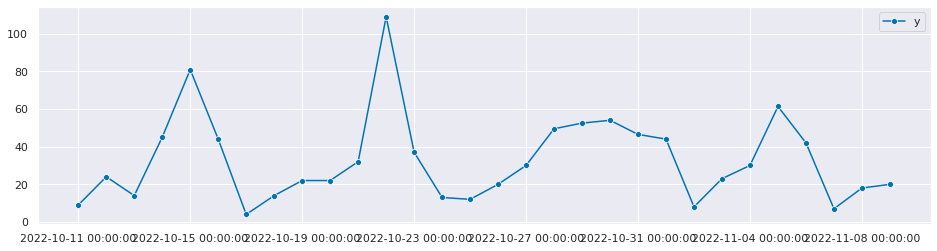

In [23]:
plot_series(y.iloc[-30:].set_index("Data"), labels=["y"])

### Time serie split and forecasting horizon generation (7 days: 1 week)

In [24]:
y_train, y_test = temporal_train_test_split(y[["Margherita"]], test_size=7)
fh = ForecastingHorizon(y_test.index,is_relative=False) #
fh

ForecastingHorizon([519, 520, 521, 522, 523, 524, 525], dtype='int64', is_relative=False)

In [25]:
y_train

,Margherita
0,21.0
1,37.0
2,19.0
3,22.0
4,61.0
...,...
514,52.5
515,54.0
516,46.5
517,44.0


In [26]:
y_test

,Margherita
519,23.00
520,30.00
521,61.33
522,42.00
523,7.00
524,18.00
525,20.00


In [27]:
#for storing the results
results = []

### Forecaster 1: Exoponetial smoothing

In [28]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

{'Model name': 'ExponentialSmoothing', 'MAPE': 61.635419153592686, 'Perc. err. week': 35.715880753075595}


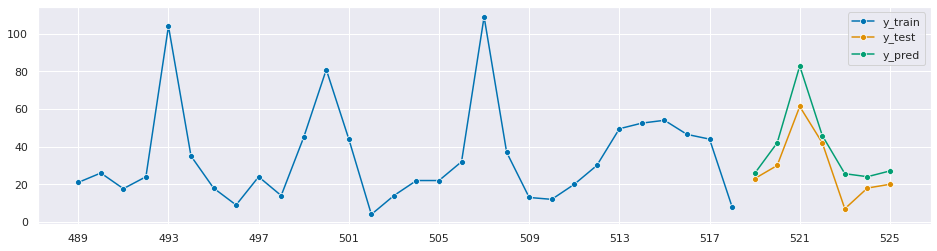

In [29]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=7)

forecaster.fit(y_train, fh=fh)
y_pred = forecaster.predict(fh)
plot_series(y_train.iloc[-30:], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False) * 100
# complessive error over the week
pe_week = 100 * ( (y_pred.sum()- y_test.sum()) / y_test.sum() ).iloc[0]

data = {"Model name": "ExponentialSmoothing", "MAPE": mape, "Perc. err. week": pe_week}
results.append(data)
print(data)

### Forecaster 2: facebook Prophet

In [30]:
from sktime.forecasting.fbprophet import Prophet

{'Model name': 'Prophet', 'MAPE': 59.57382148373629, 'Perc. err. week': 20.650353808010806}


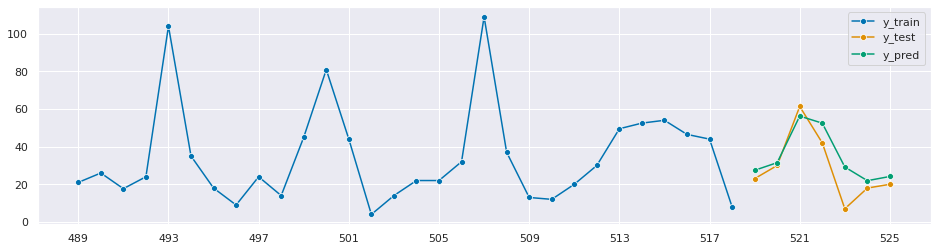

In [31]:
forecaster = Prophet(
    seasonality_mode="additive",
    changepoint_range=0.95,
    mcmc_samples = 1000,
    alpha =0.2,
    uncertainty_samples = 1000,
    add_country_holidays={"country_name": "Italy"},
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
)

forecaster.fit(y_train)#.iloc[-28:])
y_pred = forecaster.predict(fh)
plot_series(y_train.iloc[-30:], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False) * 100
# complessive error over the week
pe_week = 100 * ( (y_pred.sum()- y_test.sum()) / y_test.sum() ).iloc[0]

data = {"Model name": "Prophet", "MAPE": mape, "Perc. err. week": pe_week}
results.append(data)
print(data)

### Forecaster 3: BATS

{'Model name': 'BATS', 'MAPE': 41.45109722231549, 'Perc. err. week': 6.487004265456648}


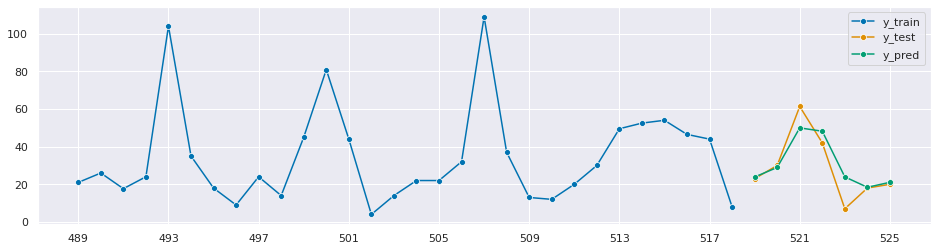

In [32]:
from sktime.forecasting.bats import BATS
forecaster = BATS(sp=7, use_trend=True, use_box_cox=True, use_damped_trend=True)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train.iloc[-30:], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False) * 100
# complessive error over the week
pe_week = 100 * ( (y_pred.sum()- y_test.sum()) / y_test.sum() ).iloc[0]

data = {"Model name": "BATS", "MAPE": mape, "Perc. err. week": pe_week}
results.append(data)
print(data)

### Forecaster 4: Auto Arima (statsmodels)

/usr/local/lib/python3.8/dist-packages/statsforecast/arima.py:861: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsforecast/arima.py:861: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsforecast/arima.py:861: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsforecast/arima.py:861: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsforecast/arima.py:861: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsforecast/arima.py:861: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsforecast/arima.py:861: UserWarning: possible convergence probl

{'Model name': 'StatsForecastAutoARIMA', 'MAPE': 41.27214881479006, 'Perc. err. week': 18.909042115837277}


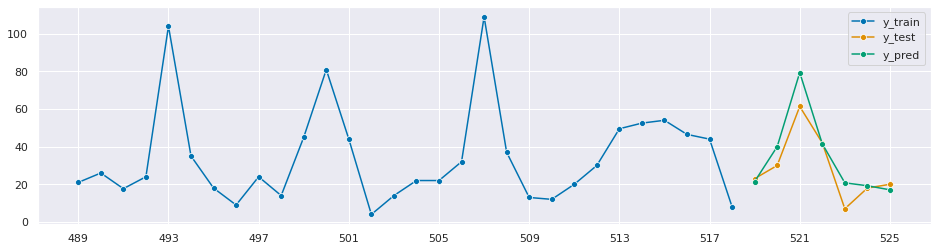

In [33]:
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
forecaster = StatsForecastAutoARIMA(sp=7)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train.iloc[-30:], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False) * 100
# complessive error over the week
pe_week = 100 * ( (y_pred.sum()- y_test.sum()) / y_test.sum() ).iloc[0]

data = {"Model name": "StatsForecastAutoARIMA", "MAPE": mape, "Perc. err. week": pe_week}
results.append(data)
print(data)

### Forecaster 5: Auto Arima (pmarima)

{'Model name': 'AutoARIMA', 'MAPE': 57.14410078279596, 'Perc. err. week': 28.405724143221928}


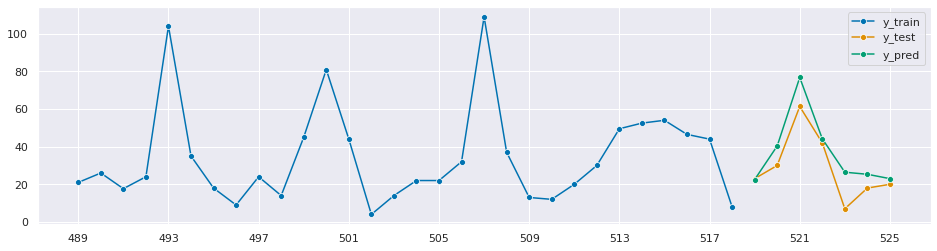

In [34]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=7, suppress_warnings=True)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train.iloc[-30:], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False) * 100
# complessive error over the week
pe_week = 100 * ( (y_pred.sum()- y_test.sum()) / y_test.sum() ).iloc[0]

data = {"Model name": "AutoARIMA", "MAPE": mape, "Perc. err. week": pe_week}
results.append(data)
print(data)

### Forecaster 6: AutoETS

{'Model name': 'AutoETS', 'MAPE': 62.478012135526754, 'Perc. err. week': 37.43117304695749}


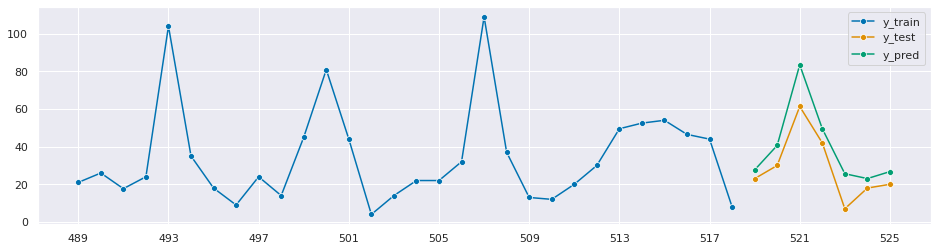

In [35]:
from sktime.forecasting.ets import AutoETS
forecaster = AutoETS(auto=True, sp=7, n_jobs=-1, trend="add")

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train.iloc[-30:], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False) * 100
# complessive error over the week
pe_week = 100 * ( (y_pred.sum()- y_test.sum()) / y_test.sum() ).iloc[0]

data = {"Model name": "AutoETS", "MAPE": mape, "Perc. err. week": pe_week}
results.append(data)
print(data)

In [38]:
df_results = pd.DataFrame.from_dict(results)
df_results.set_index("Model name",inplace=True)
df_results

,MAPE,Perc. err. week
Model name,,
ExponentialSmoothing,61.635419,35.715881
Prophet,59.573821,20.650354
BATS,41.451097,6.487004
StatsForecastAutoARIMA,41.272149,18.909042
AutoARIMA,57.144101,28.405724
AutoETS,62.478012,37.431173


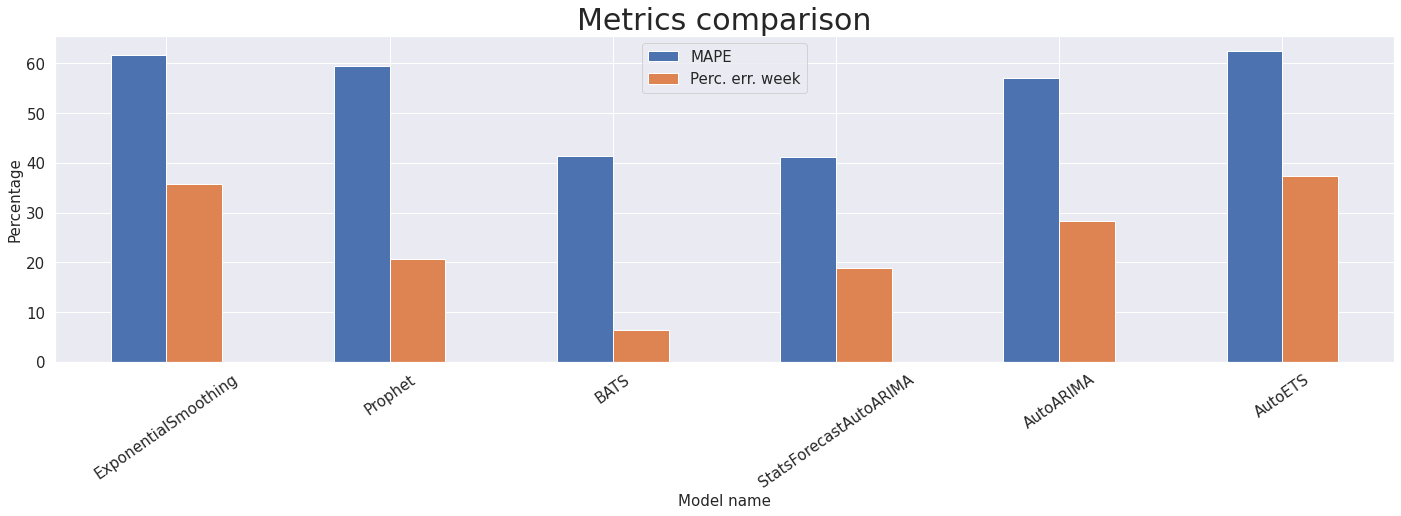

In [56]:
df_results.plot(kind="bar",figsize=(24,6))
plt.xticks(rotation = 35,fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Metrics comparison",fontsize = 30)
plt.ylabel("Percentage",fontsize = 15)
plt.xlabel("Model name",fontsize = 15)
plt.legend(fontsize = 15)